In [1]:
%pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


### Importing the necessary packages

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import seaborn as sns

In [3]:
file_path = r"/Users/ugurcanuzunkaya/Documents/GitHub/Private/machine_learning/project/bank_transactions.csv"

In [4]:
# Load the dataset
data = pd.read_csv(file_path)

In [5]:
others = data[data['CustGender'] == 'T']
others

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


### Dropping CustGender == "T" because there is only one of them because it effects the plots.

In [6]:
# Remove rows where 'CustGender' is 'T'
data = data[data['CustGender'] != 'T']

# Reset the index after filtering
data.reset_index(drop=True, inplace=True)

# Drop rows where 'CustGender' is NaN
data.dropna(subset=['CustGender'], inplace=True)

# Check the unique values in 'CustGender' to confirm 'T' and NaN are gone
unique_genders = data['CustGender'].unique()

unique_genders

array(['F', 'M'], dtype=object)

In [7]:
# Show the first 5 rows
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [8]:
# See the column names
print(data.columns)

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


In [9]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TransactionID                 0
CustomerID                    0
CustomerDOB                3334
CustGender                    0
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [10]:
# Convert CustomerDOB to datetime
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], format='%d/%m/%y', errors='coerce')

# Handling two-digit year issue
current_year = datetime.now().year
data['CustomerDOB'] = data['CustomerDOB'].apply(lambda x: x if x.year <= current_year else x.replace(year=x.year - 100))

# Calculate Age
data['Age'] = current_year - data['CustomerDOB'].dt.year

In [11]:
# Remove rows where 'CustGender' is 'T' or NaN
data = data[data['CustGender'] != 'T']
data.dropna(subset=['CustGender', 'CustAccountBalance', 'TransactionAmount (INR)', 'Age'], inplace=True)

# Reset the index after filtering
data.reset_index(drop=True, inplace=True)

In [12]:
# Show the new dataset
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,30.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,67.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,28.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,51.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,36.0


In [13]:
# Overview of the dataset
print("Dataset Overview:")
print(data.describe())

Dataset Overview:
                         CustomerDOB  CustAccountBalance  TransactionTime  \
count                         985473        9.854730e+05    985473.000000   
mean   1985-06-21 21:41:37.832817600        1.060590e+05    157433.826553   
min              1925-05-06 00:00:00        0.000000e+00         0.000000   
25%              1982-02-10 00:00:00        4.581130e+03    124242.000000   
50%              1987-09-13 00:00:00        1.600759e+04    164625.000000   
75%              1991-05-12 00:00:00        5.375908e+04    200150.000000   
max              2024-02-09 00:00:00        1.150355e+08    235959.000000   
std                              NaN        8.178443e+05     51269.472874   

       TransactionAmount (INR)            Age  
count             9.854730e+05  985473.000000  
mean              1.452449e+03      39.025845  
min               0.000000e+00       0.000000  
25%               1.510000e+02      33.000000  
50%               4.310000e+02      37.000000  


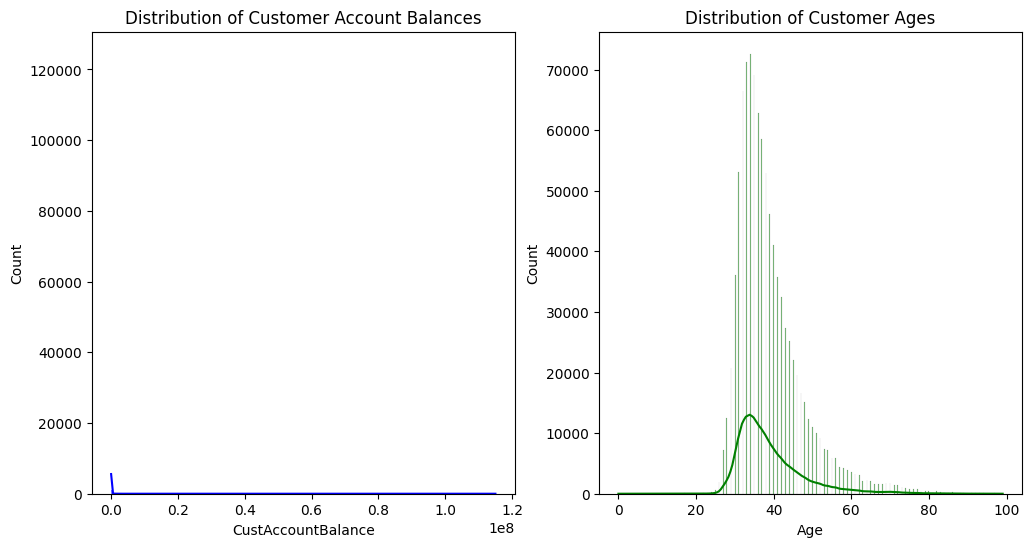

In [14]:
# Distribution of numerical data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['CustAccountBalance'], kde=True, color='blue')
plt.title('Distribution of Customer Account Balances')

plt.subplot(1, 2, 2)
sns.histplot(data['Age'].dropna(), kde=True, color='green')  # dropna to handle any missing values
plt.title('Distribution of Customer Ages')
plt.show()

### Müşteri Hesap Bakiyelerinin Dağılımı (Customer Account Balances)
- **Sağa Yönelik Sapma**: Müşterilerin çoğunun düşük bakiyeleri var, çok yüksek bakiyelere sahip birkaç aykırı değer mevcut.

### Müşteri Yaşlarının Dağılımı (Customer Ages)
- **Genç Müşteri Tabanı**: Dağılım genellikle 30 yaş civarında zirve yapar, bankanın müşteri tabanı nispeten genç.

### Müşteri Segmentasyonu İçin Çıkarımlar (İki grafikle beraber)
- **Bakiyeler ve Yaş**: Bakiyelerdeki sapma ve genç müşteri profili göz önüne alındığında, banka gençlere yönelik ürün ve pazarlama stratejileri geliştirebilir ve yaşlı müşterileri çekmek için ek stratejiler oluşturabilir.


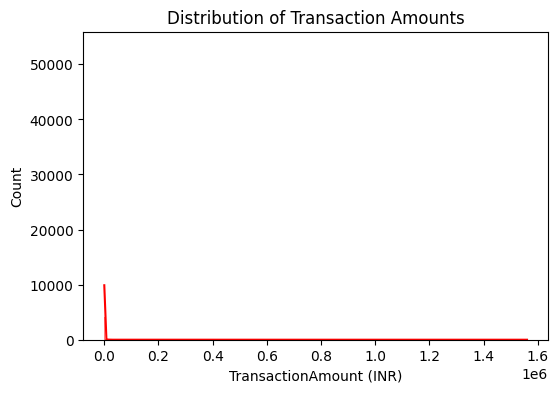

In [15]:
# Transaction amount distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['TransactionAmount (INR)'], kde=True, color='red')
plt.title('Distribution of Transaction Amounts')
plt.show()

### İşlem Tutarlarının Dağılımı
- **Yoğun Düşük Tutarlar**: İşlem tutarları ağırlıklı olarak düşük; çoğu işlem çok küçük miktarlarda gerçekleşmiş.
- **Aykırı Değerlerin Varlığı**: Çok yüksek işlem tutarları nadiren görülüyor ve grafikte uzun kuyruklar olarak belirginleşiyor.

Bankanın çoğunlukla küçük miktarlardaki işlemlere hizmet verdiğini gösteriyor. Bu durum, müşteri tabanının finansal aktivitelerinin çoğunlukla düşük tutarlı olduğunu işaret eder.

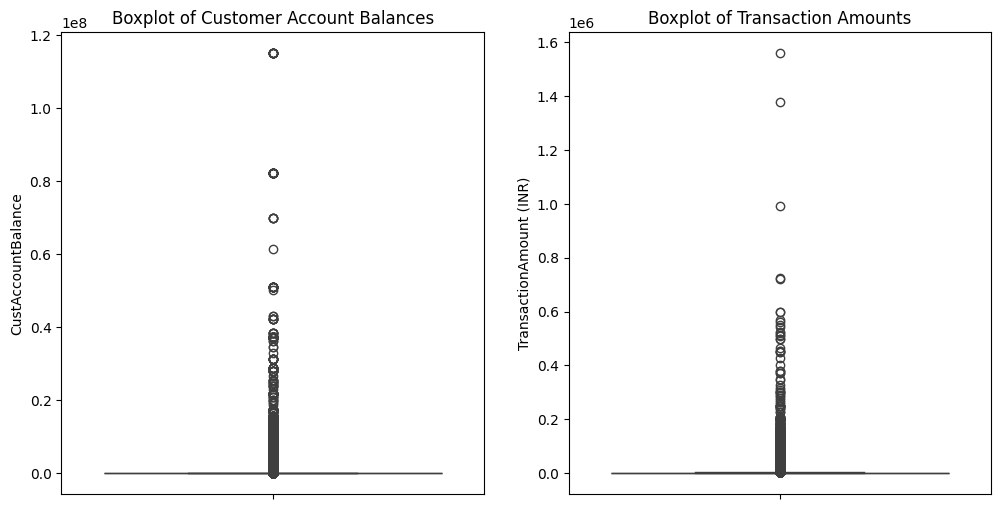

In [16]:
# Boxplot for further outlier analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['CustAccountBalance'])
plt.title('Boxplot of Customer Account Balances')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['TransactionAmount (INR)'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

### Müşteri Hesap Bakiyelerinin Kutu Grafiği
- **Yoğunlaşma Düşük Bakiyede**: Hesap bakiyelerinin büyük çoğunluğu düşük bakiye aralığında yoğunlaşmış.
- **Çok Sayıda Aykırı Değer**: Çok yüksek bakiyelere sahip hesaplar aykırı değer olarak belirginleşiyor, bu da bakiyeler arasında büyük farklılıklar olduğunu gösteriyor.

### İşlem Tutarlarının Kutu Grafiği
- **Düşük Ortalama İşlem Tutarı**: İşlem tutarları genellikle düşük, medyan değer çok düşük seviyede.
- **Bazı Büyük İşlemler**: Nadir de olsa yüksek miktarlı işlemler var ve bunlar aykırı değerler olarak grafikte görülüyor.

Düşük bakiyeler ve işlem tutarları bankanın genel müşteri aktivitesinin karakteristiğini ortaya koyarken, yüksek değerlerdeki aykırılar da dikkate alınmalıdır. Bu bilgiler, risk yönetimi ve müşteri hizmetleri stratejilerinin geliştirilmesinde kullanılır.

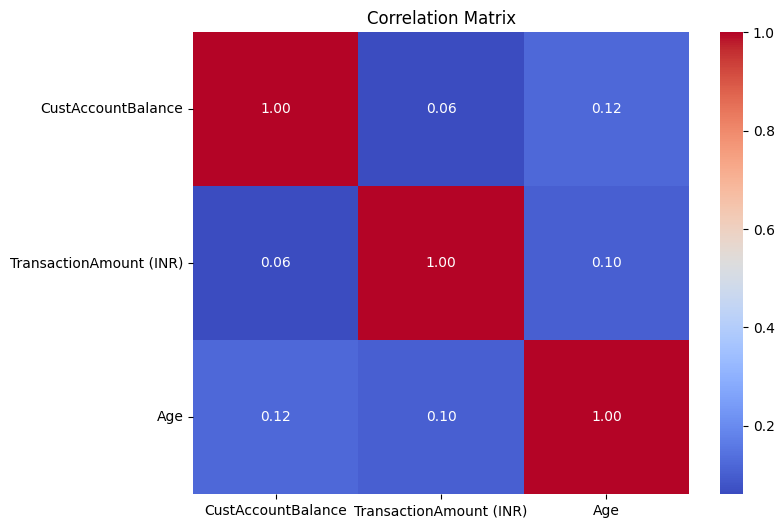

In [17]:
# Correlation matrix
correlation = data[['CustAccountBalance', 'TransactionAmount (INR)', 'Age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Korelasyon Matrisi Analizi
- **Düşük Korelasyonlar**: Hesap bakiyesi (`CustAccountBalance`), işlem tutarı (`TransactionAmount (INR)`), ve yaş (`Age`) arasındaki korelasyonlar oldukça düşük. En yüksek korelasyon (0.12) hesap bakiyesi ile yaş arasında görülmektedir.


Bu düşük korelasyonlar, hesap bakiyesi, işlem tutarı ve yaş değişkenlerinin her birinin müşteri segmentasyonu modelinde bağımsız olarak önemli olabileceğine işaret eder. Bu durum, müşteri segmentasyonunda bu üç özelliğin birlikte kullanılmasının farklı müşteri gruplarını ayırt etmede yardımcı olabileceğini gösterir.

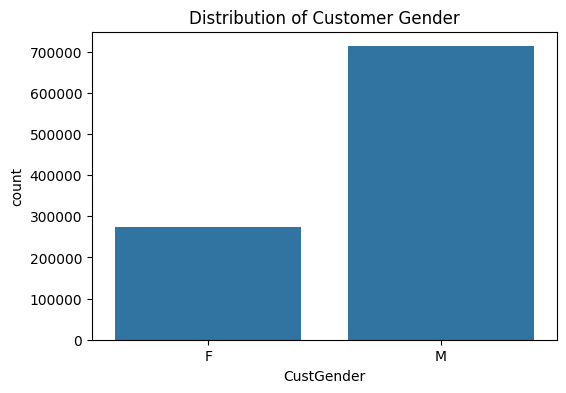

In [18]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='CustGender')
plt.title('Distribution of Customer Gender')
plt.show()

### Müşteri Cinsiyet Dağılımı
- **Erkek Dominasyonu**: Grafiğe göre, erkek müşteriler (M) toplam müşteri sayısında açık bir şekilde dominant. Bu, bankanın erkek müşterilere daha fazla hizmet verdiğini gösteriyor.
- **Kadın Müşteriler**: Kadın müşteriler (F) sayısı erkeklerin yarısından az.

Bu cinsiyet dağılımı, bankanın pazarlama ve ürün teklif stratejilerini cinsiyete göre özelleştirmesi için faydalı olabilir. Ayrıca, bankanın kadın müşterileri çekmek ve onlara yönelik hizmetlerini geliştirmek için ek çalışmalar yapması gerekebilir.

In [19]:
# Count the occurrences of each location
location_counts = data['CustLocation'].value_counts()

# Display the frequency of each location
print(location_counts)

CustLocation
MUMBAI                       97679
BANGALORE                    77751
NEW DELHI                    76380
GURGAON                      70518
DELHI                        67335
                             ...  
KAMALPUR                         1
JUFFAIR                          1
CHAKALA ANDHERI -E MUMBAI        1
CORPORATION THANE                1
IMPERIA THANE WEST               1
Name: count, Length: 8164, dtype: int64


In [20]:
# Threshold for minimum occurrences
threshold = 1000

# Filter locations that appear at least 'threshold' times
frequent_locations = location_counts[location_counts >= threshold].index

# Filter the dataset to include only these locations
filtered_data = data[data['CustLocation'].isin(frequent_locations)]

print(frequent_locations, len(frequent_locations), "cities")

Index(['MUMBAI', 'BANGALORE', 'NEW DELHI', 'GURGAON', 'DELHI', 'NOIDA',
       'CHENNAI', 'PUNE', 'HYDERABAD', 'THANE', 'KOLKATA', 'GHAZIABAD',
       'NAVI MUMBAI', 'AHMEDABAD', 'FARIDABAD', 'JAIPUR', 'CHANDIGARH',
       'LUCKNOW', 'MOHALI', 'SURAT', 'NASHIK', 'LUDHIANA', 'VISAKHAPATNAM',
       'DEHRADUN', 'INDORE', 'VADODARA', 'AMRITSAR', 'AGRA', 'KANPUR',
       'NAGPUR', 'MEERUT', 'COIMBATORE', 'GREATER NOIDA', 'PANCHKULA',
       'AURANGABAD', 'GUNTUR', 'GUWAHATI', 'RANGA REDDY', 'JALANDHAR',
       'BHOPAL', 'PATNA', 'UDAIPUR', 'ERNAKULAM', 'RANCHI', 'REWARI',
       'BENGALURU', 'HOWRAH', 'PATIALA', 'SECUNDERABAD', 'ALWAR', 'ALLAHABAD',
       'NORTH 24 PARGANAS', 'SONIPAT', 'PANIPAT', 'BAMBOLIM', 'ZIRAKPUR',
       'RAJKOT', 'RAIPUR', 'KOLHAPUR', 'SILIGURI', 'BAREILLY', 'JAMSHEDPUR',
       'ALIGARH', 'KARNAL', 'MANGALORE', 'KANGRA', 'WARANGAL', 'SAHARANPUR',
       'HOSUR', 'KOTTAYAM', 'AMBALA', 'KHARAR', 'MORADABAD', 'VARANASI',
       'JAMMU', 'SAS NAGAR', 'SALEM', 'VAPI',

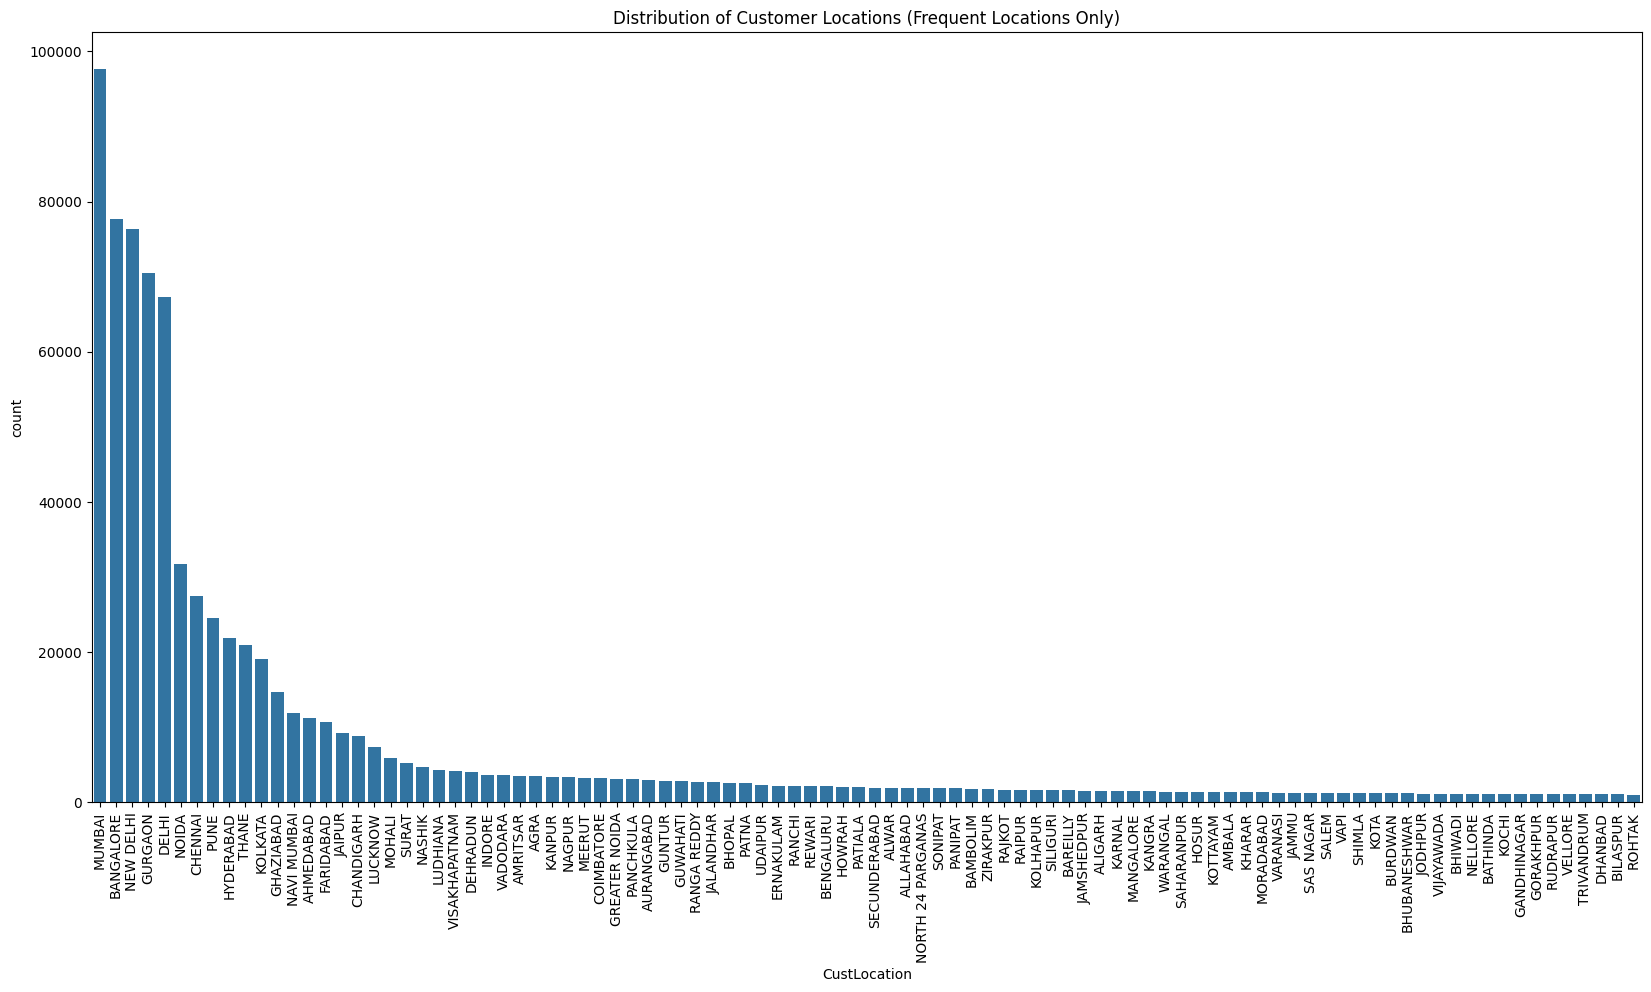

In [21]:
# Plot the distribution of customer locations with filtered data
plt.figure(figsize=(20, 10))
sns.countplot(data=filtered_data, x='CustLocation', order=frequent_locations)
plt.title('Distribution of Customer Locations (Frequent Locations Only)')
plt.xticks(rotation=90)  # Rotate the location names for better readability
plt.show()

### Müşteri Konumlarının Dağılımı
- **Yoğunlaşma Büyük Şehirlerde**: Müşterilerin çoğunluğu büyük şehirlerde yoğunlaşmış, özellikle Mumbai, New Delhi ve Bengaluru gibi metropoller en fazla müşteriye sahip.
- **Hızlı Düşüş**: En yoğun şehirlerden sonra müşteri sayısında hızlı bir düşüş gözlemleniyor, bu da bazı bölgelerin banka tarafından çok daha yoğun kullanıldığını gösteriyor.
- **Uzun Kuyruk**: Grafikte, çok sayıda müşteriye sahip birkaç büyük şehir dışında, az sayıda müşteriye sahip çok sayıda küçük yerleşim yerinin varlığı uzun bir kuyruk oluşturuyor.

Bu bilgiler, bankanın pazarlama ve hizmet sunumu stratejilerini bu büyük şehirler üzerine yoğunlaştırması gerektiğini gösterirken, daha az yoğun bölgelerdeki potansiyeli değerlendirme ihtiyacını da ortaya koyuyor. Büyük şehirlerdeki yoğun rekabet ve müşteri tabanının genişliği, özelleştirilmiş hizmetler ve lokal pazarlama kampanyaları için fırsatlar sunabilir.

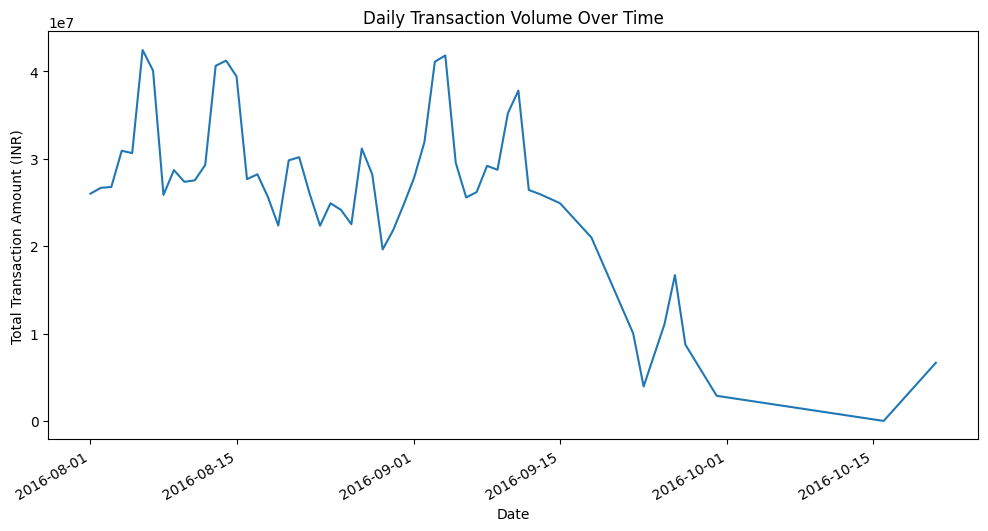

In [22]:
# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d/%m/%y')

# Time series plot of transaction amounts over time
plt.figure(figsize=(12, 6))
data.groupby('TransactionDate')['TransactionAmount (INR)'].sum().plot()
plt.title('Daily Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (INR)')
plt.show()

### Günlük İşlem Hacmi Analizi
- **Dalgalanmalar**: İşlem hacminde belirgin dalgalanmalar görülmektedir; bazı günlerde işlem hacmi önemli derecede yüksekken, diğer günlerde düşüşler gözlemlenmiştir.
- **Zirve Noktaları**: Özellikle Eylül ayının başında ve Ekim ayının ortalarında işlem hacminde sıradışı zirveler görülmektedir.
- **Düşüş Trendi**: Ekim ayı ortalarından itibaren işlem hacminde genel bir düşüş trendi gözlenmekte, bu trendin ardından kısmi bir toparlanma söz konusu olmuştur.

Bu tür dalgalanmaların nedenleri araştırılmalı ve işlem hacmindeki bu zirve ve düşüşlerin altında yatan faktörler belirlenmeli. Örneğin, pazar etkinlikleri, ekonomik haberler veya banka içi kampanyalar gibi faktörler işlem hacmindeki bu değişimlere neden olmuş olabilir. İşlem hacmindeki bu tür zirve noktaları, bankanın likidite yönetimi ve risk değerlendirmeleri için önemli olabilir.

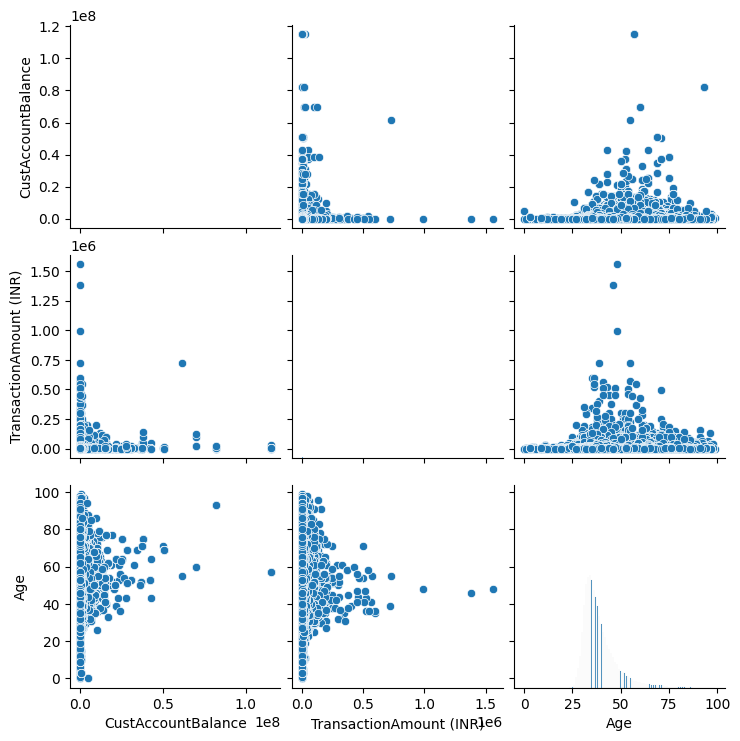

In [23]:
# Pair plot of selected features
sns.pairplot(data[['CustAccountBalance', 'TransactionAmount (INR)', 'Age']])
plt.show()

### Çift Değişkenli Dağılım Grafikleri Analizi
- **Hesap Bakiyesi ve İşlem Tutarı**: Hesap bakiyesi yüksek olan müşterilerin, işlem tutarlarının da genellikle yüksek olduğu görülmemektedir. Çoğu veri noktası düşük bakiye ve düşük işlem tutarlarına yoğunlaşmıştır.
- **Hesap Bakiyesi ve Yaş**: Yaş ile hesap bakiyesi arasında belirgin bir korelasyon görülmemekte; ancak yaş ilerledikçe hesap bakiyeleri de artma eğiliminde.
- **İşlem Tutarı ve Yaş**: Yaş ile işlem tutarı arasında da belirgin bir ilişki görülmemekte. Çoğu yaş grubu için işlem tutarları düşük seviyelerde yoğunlaşmış.
- **Yaş Dağılımı**: Müşteri yaş dağılımı özellikle genç nüfusta yoğunlaşmış, yaş ilerledikçe müşteri sayısı azalmaktadır.

Genç müşteri grubuna yönelik ürünlerin ve hizmetlerin optimize edilmesi gerekmektedir.

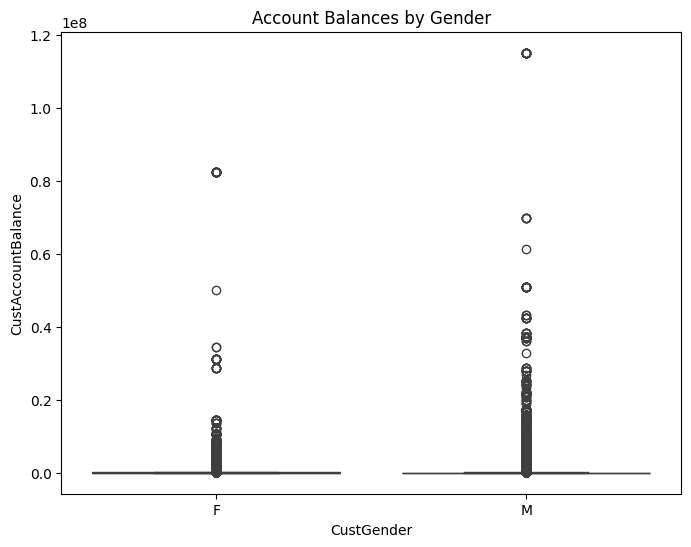

In [24]:
# Boxplot of account balances by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='CustGender', y='CustAccountBalance', data=data)
plt.title('Account Balances by Gender')
plt.show()

### Hesap Bakiyelerinin Cinsiyete Göre Dağılımı
- **Genel Dağılım**: Tüm cinsiyet kategorilerinde hesap bakiyeleri büyük oranda düşük seviyelerde yoğunlaşmış, ancak her grupta çok yüksek bakiyelere sahip az sayıda müşteri bulunmaktadır.
- **Erkekler (M)**: Erkek müşteriler arasında yüksek bakiyeli hesap sayısı kadınlara göre daha fazla görünmektedir, ancak büyük çoğunluk düşük bakiyelere sahiptir.
- **Kadınlar (F)**: Kadın müşterilerin bakiyeleri genellikle düşük, yüksek bakiyeler erkekler kadar sık değil.

Bu görselleştirme, bankanın cinsiyet bazında müşteri servis stratejilerini ve ürün tekliflerini değerlendirirken, müşteri hesap bakiyelerinin dağılımını dikkate alması gerektiğini göstermektedir. Erkek müşteriler arasında yüksek bakiyeli hesapların varlığı, bu grubun potansiyel olarak daha fazla finansal servis veya ürün talep edebileceğine işaret edebilir.

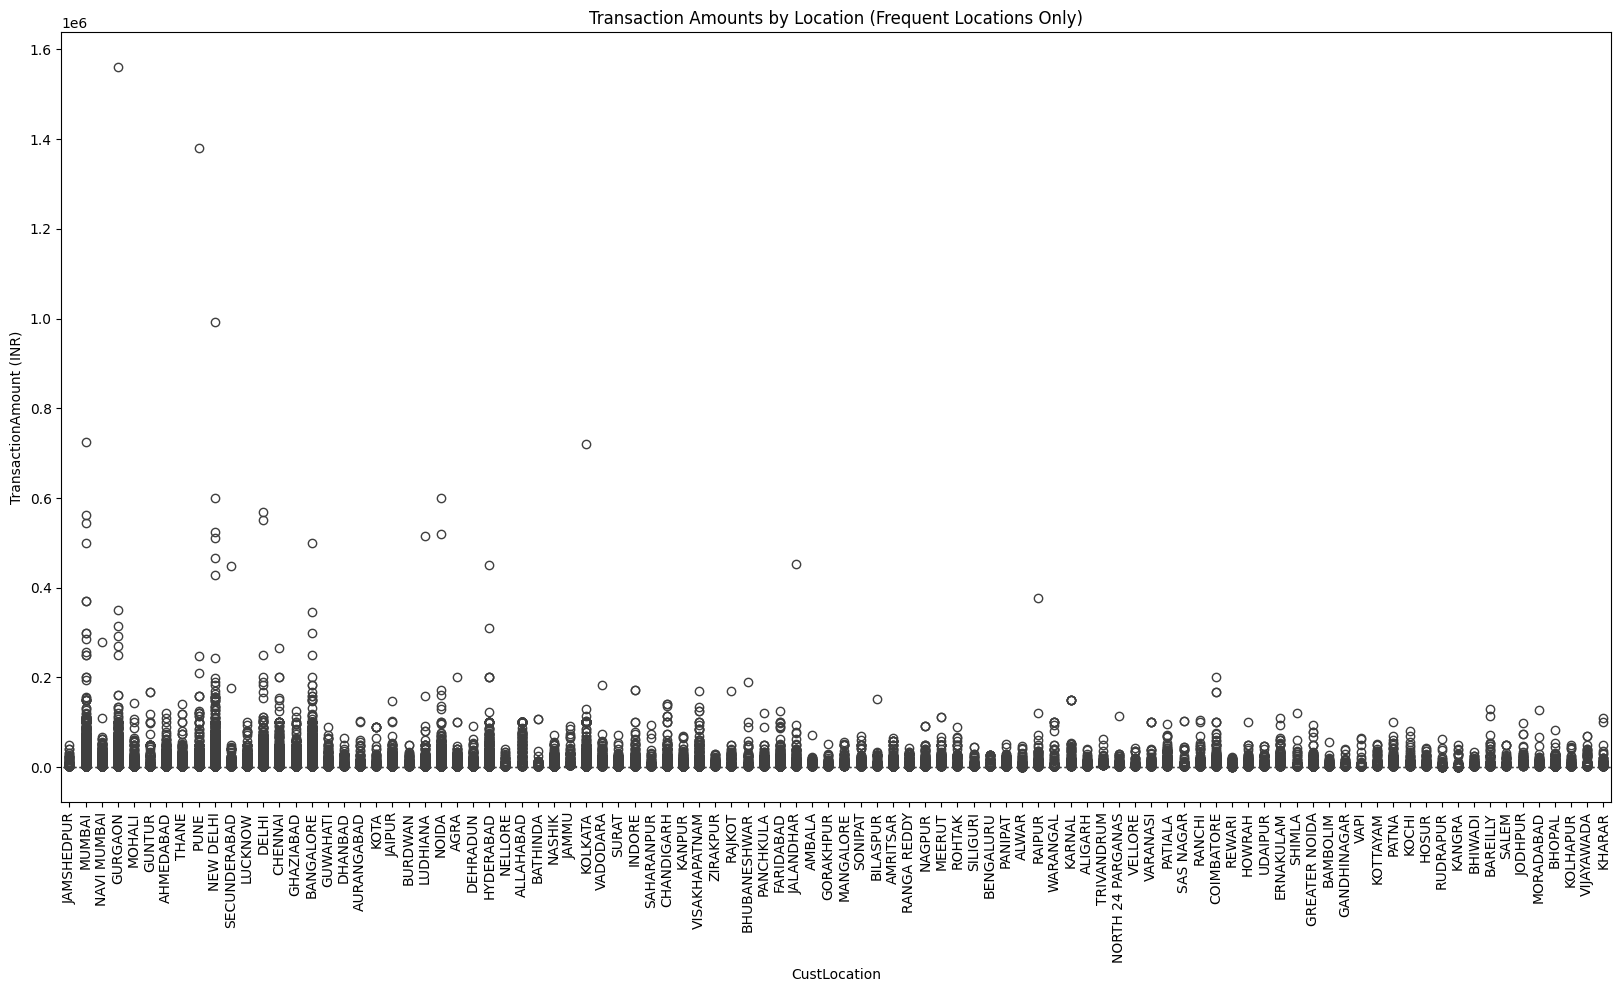

In [25]:
# Boxplot of transaction amounts by location using the filtered data
plt.figure(figsize=(20, 10))
sns.boxplot(x='CustLocation', y='TransactionAmount (INR)', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Transaction Amounts by Location (Frequent Locations Only)')
plt.show()

### İşlem Tutarlarının Konum Bazında Dağılımı
- **Genel Düşük İşlem Tutarları**: Çoğu konumda işlem tutarları genellikle düşük. Bu, bankanın çoğu konumda küçük miktarlarda işlemleri işlediğini gösteriyor.
- **Yüksek İşlem Tutarları**: Bazı konumlarda yüksek işlem tutarları görülmekte, ancak bunlar az sayıdadır. Bu, belirli yerlerde büyük ödemeler veya transferler yapıldığını işaret edebilir.
- **Konumlar Arası Farklılıklar**: İşlem tutarları konumdan konuma önemli farklılıklar gösteriyor, bazı şehirlerde daha yüksek işlem hacimleri dikkat çekiyor.

Banka, işlem hacminin yüksek olduğu konumlara özel pazarlama stratejileri veya müşteri hizmet teklifleri geliştirebilir. Ayrıca, düşük işlem tutarlarının yaygın olduğu konumlarda müşteri etkileşimini artırmaya yönelik çalışmalar yapabilir.

In [26]:
# Select relevant features for clustering
features = data[['CustAccountBalance', 'TransactionAmount (INR)', 'Age']]

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [28]:
from sklearn.cluster import KMeans

# K-Means Model
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans_labels5 = kmeans5.fit_predict(features_scaled)

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_scaled)

def plot_clusters(labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.grid(True)
    plt.show()

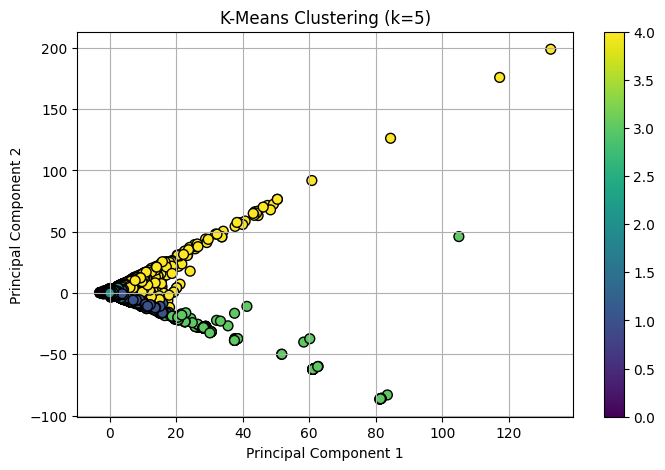

In [55]:
plot_clusters(kmeans_labels5, 'K-Means Clustering (k=5)')

In [31]:
print("K-Means (k=5) Inertia:", kmeans5.inertia_)

K-Means (k=5) Inertia: 1178137.0603435189


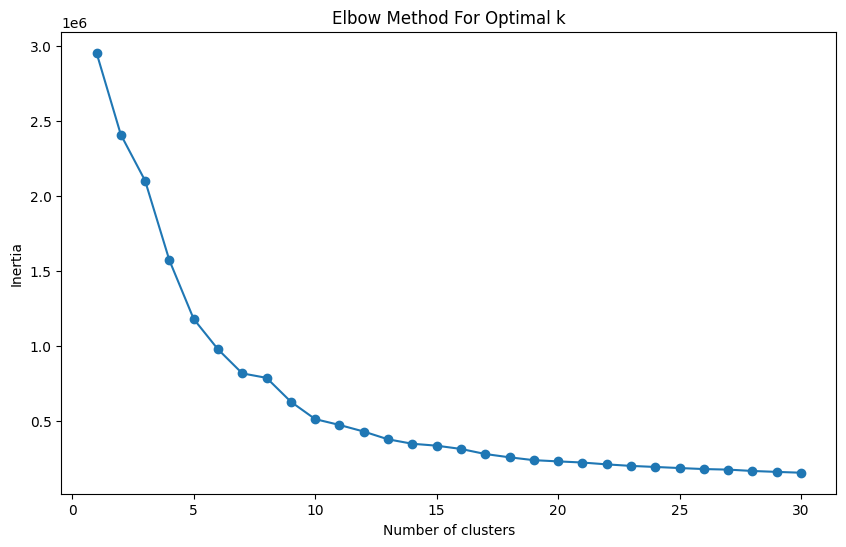

In [56]:
inertia_list = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia_list.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

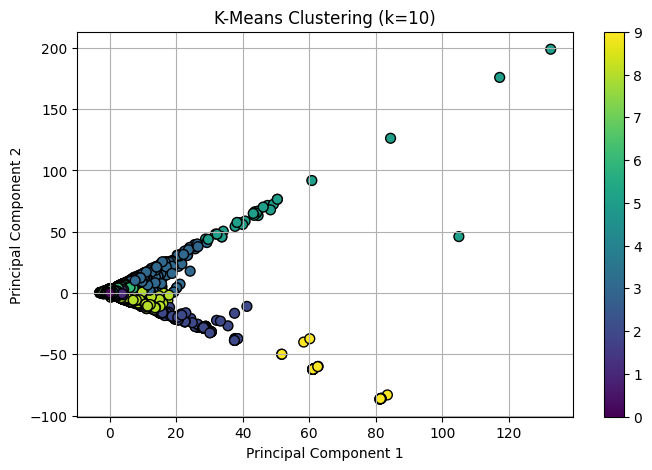

In [57]:
kmeans10 = KMeans(n_clusters=10, random_state=42)
kmeans10.fit(features_scaled)
kmeans_labels10 = kmeans10.predict(features_scaled)
plot_clusters(kmeans_labels10, 'K-Means Clustering (k=10)')

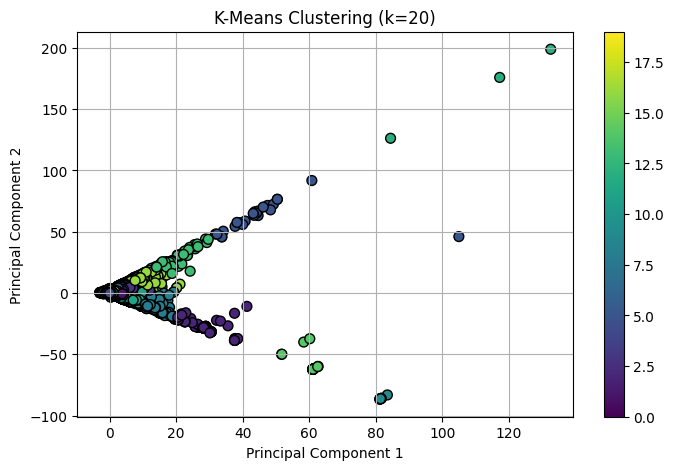

In [58]:
kmeans20 = KMeans(n_clusters=20, random_state=42)
kmeans20.fit(features_scaled)
kmeans_labels20 = kmeans20.predict(features_scaled)
plot_clusters(kmeans_labels20, 'K-Means Clustering (k=20)')

In [35]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Models
gmm5 = GaussianMixture(n_components=5, random_state=42)
gmm_labels5 = gmm5.fit_predict(features_scaled)

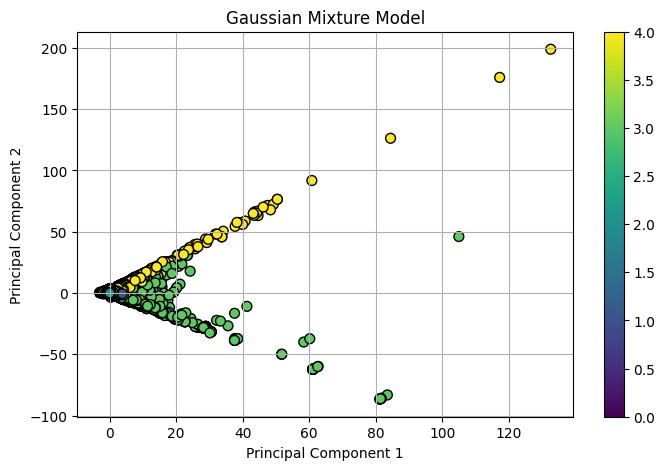

In [59]:
plot_clusters(gmm_labels5, 'Gaussian Mixture Model')

In [37]:
print("Log-likelihood: ", gmm5.score(features_scaled))
print("BIC: ", gmm5.bic(features_scaled))
print("AIC: ", gmm5.aic(features_scaled))

Log-likelihood:  0.717464195788158
BIC:  -1413406.9438584978
AIC:  -1413985.1868318869


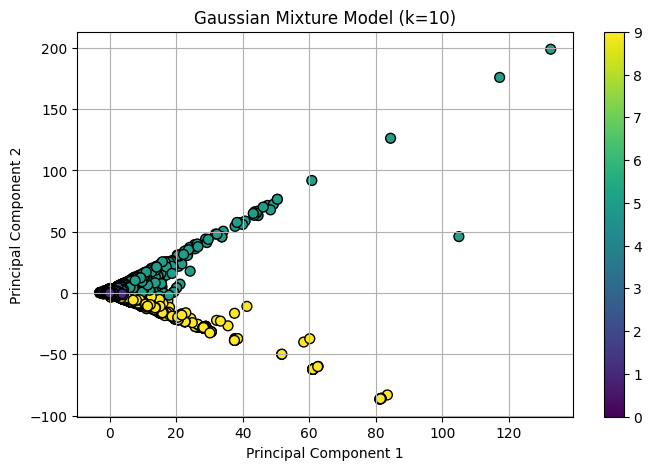

In [60]:
gmm10 = GaussianMixture(n_components=10, random_state=42)
gmm_labels10 = gmm10.fit_predict(features_scaled)
plot_clusters(gmm_labels10, 'Gaussian Mixture Model (k=10)')

In [39]:
print("Log-likelihood: ", gmm10.score(features_scaled))
print("BIC: ", gmm10.bic(features_scaled))
print("AIC: ", gmm10.aic(features_scaled))

Log-likelihood:  1.1188364711331504
BIC:  -2203799.9806102123
AIC:  -2204968.267433998


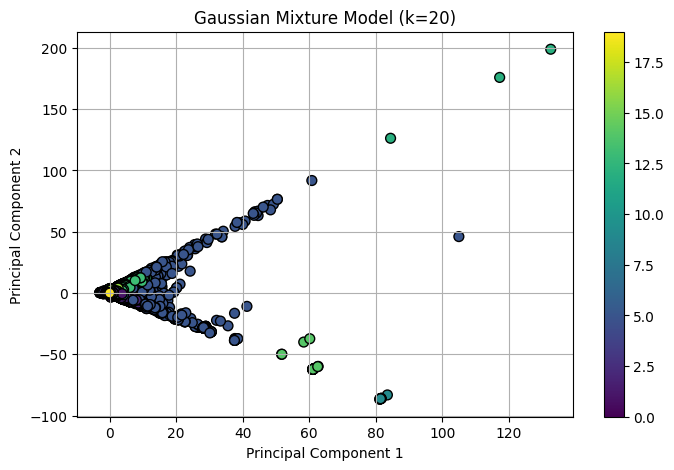

In [61]:
gmm20 = GaussianMixture(n_components=20, random_state=42)
gmm_labels20 = gmm20.fit_predict(features_scaled)
plot_clusters(gmm_labels20, 'Gaussian Mixture Model (k=20)')

In [41]:
print("Log-likelihood: ", gmm20.score(features_scaled))
print("BIC: ", gmm20.bic(features_scaled))
print("AIC: ", gmm20.aic(features_scaled))

Log-likelihood:  1.2723952620082417
BIC:  -2505075.977549516
AIC:  -2507424.352074096


In [49]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def evaluate_kmeans(features_scaled, labels):
    ch_score = calinski_harabasz_score(features_scaled, labels)
    db_score = davies_bouldin_score(features_scaled, labels)

    return ch_score, db_score

In [50]:
print("K-Means (k=5) Evaluation:")
print(evaluate_kmeans(features_scaled, kmeans_labels5))
print("\nK-Means (k=10) Evaluation:")
print(evaluate_kmeans(features_scaled, kmeans_labels10))
print("\nK-Means (k=20) Evaluation:")
print(evaluate_kmeans(features_scaled, kmeans_labels20))

K-Means (k=5) Evaluation:
(371866.83266445756, 0.751739768040121)

K-Means (k=10) Evaluation:
(526094.3392456527, 0.6309362426503491)

K-Means (k=20) Evaluation:
(623785.4185722572, 0.6549496916814246)


In [53]:
from sklearn.metrics import silhouette_score

def evaulate_silhouette(features_scaled, labels):
    return silhouette_score(features_scaled, labels)

print("K-Means (k=5) Silhouette Score:", evaulate_silhouette(features_scaled, kmeans_labels5))
print("K-Means (k=10) Silhouette Score:", evaulate_silhouette(features_scaled, kmeans_labels10))
print("K-Means (k=20) Silhouette Score:", evaulate_silhouette(features_scaled, kmeans_labels20))

K-Means (k=5) Silhouette Score: 0.49096429617396087
K-Means (k=10) Silhouette Score: 0.40934057407684454
K-Means (k=20) Silhouette Score: 0.4036304937249804


In [51]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def evaluate_gmm(features_scaled, labels):
    ch_score = calinski_harabasz_score(features_scaled, labels)
    db_score = davies_bouldin_score(features_scaled, labels)

    return ch_score, db_score

In [52]:
print("GMM (k=5) Evaluation:")
print(evaluate_gmm(features_scaled, gmm_labels5))
print("\nGMM (k=10) Evaluation:")
print(evaluate_gmm(features_scaled, gmm_labels10))
print("\nGMM (k=20) Evaluation:")
print(evaluate_gmm(features_scaled, gmm_labels20))

GMM (k=5) Evaluation:
(66397.54342089202, 2.23366467159563)

GMM (k=10) Evaluation:
(59714.160069692334, 3.0978517481705836)

GMM (k=20) Evaluation:
(62765.513419762116, 2.8874063953376696)
